<a href="https://colab.research.google.com/github/Kiruthiya/workshop/blob/main/ML%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sk-learn
from sklearn.preprocessing import StandardScaler #Preprocessing
from sklearn.model_selection import train_test_split #Spliting the data test and train
from sklearn.linear_model import LinearRegression #Model Selection - Linear regression
from sklearn.metrics import mean_absolute_error,mean_squared_error #Evaluation metrics
from sklearn.model_selection import GridSearchCV #Validation-Gridsearch
import joblib #Dumping the model


In [ ]:
df=pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv")
df.head()


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [ ]:
print(df.shape[0])
print(df.shape[1])

48204
9


In [ ]:
print(df.describe().T)

                  count         mean          std  ...      50%       75%      max
traffic_volume  48204.0  3259.818355  1986.860670  ...  3380.00  4933.000  7280.00
temp            48204.0   281.205870    13.338232  ...   282.45   291.806   310.07
rain_1h         48204.0     0.334264    44.789133  ...     0.00     0.000  9831.30
snow_1h         48204.0     0.000222     0.008168  ...     0.00     0.000     0.51
clouds_all      48204.0    49.362231    39.015750  ...    64.00    90.000   100.00

[5 rows x 8 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


In [ ]:
print(df.dtypes)

traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object


In [ ]:
missing_values=df.isnull().sum()
print(missing_values)

traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
dtype: int64


In [ ]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


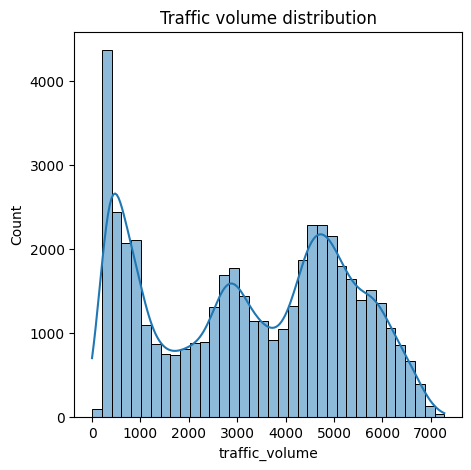

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['traffic_volume'],kde=True)
plt.title("Traffic volume distribution")
plt.show()

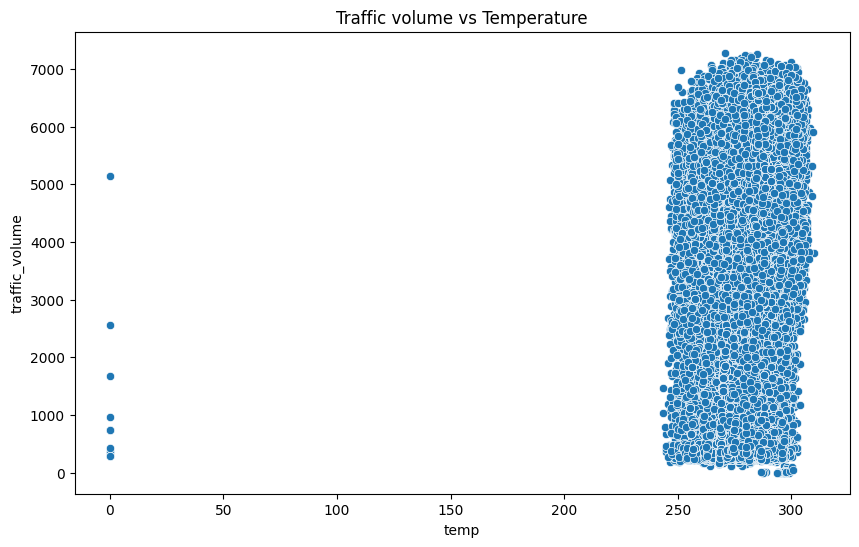

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp',y='traffic_volume',data=df)
plt.title("Traffic volume vs Temperature")
plt.show()

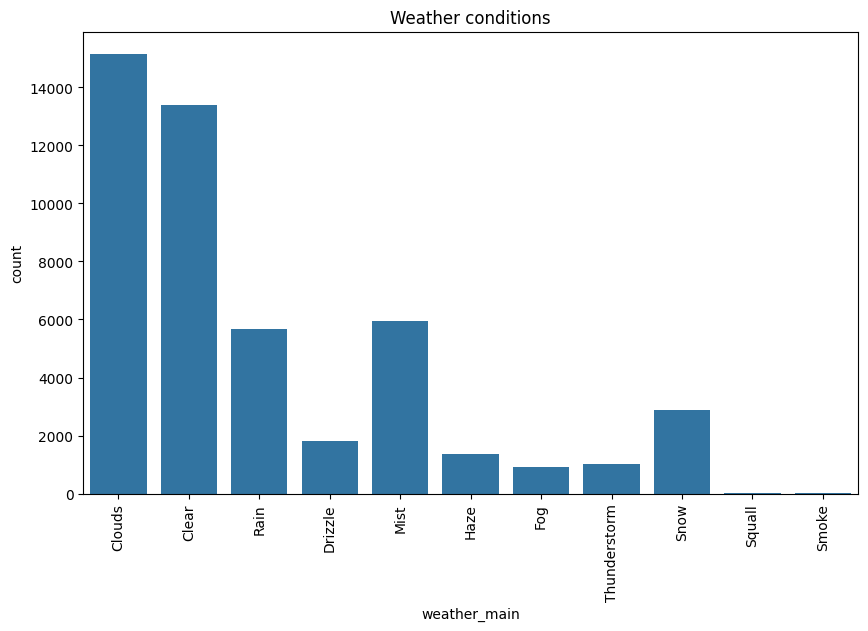

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='weather_main',data=df)
plt.title('Weather conditions')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#conert 'date_time to datetime format
df['date_time']=pd.to_datetime(df['date_time'],dayfirst=True)
#Extract features from 'date_time'
df['hour']=df['date_time'].dt.hour
df['day_of_week']=df['date_time'].dt.dayofweek
df['month']=df['date_time'].dt.month

In [32]:
import pandas as pd              # Data handling, cleaning, tabular operations
import numpy as np               # Numerical computations, arrays, stats
import matplotlib.pyplot as plt  # Static plotting (line, bar, histograms)
import seaborn as sns            # Advanced visualizations built on Matplotlib

# Machine Learning Utilities

from sklearn.model_selection import train_test_split  # Splits data into train/test sets
from sklearn.preprocessing import StandardScaler       # Normalizes/standardizes numerical features
from sklearn.ensemble import RandomForestRegressor     # Ensemble ML model for regression tasks

# Model Evaluation Metrics

from sklearn.metrics import (
    mean_absolute_error,        # Measures average magnitude of errors
    mean_squared_error,         # Penalizes larger errors more than MAE
    r2_score                    # Measures model’s explanatory power
)

import warnings
warnings.filterwarnings("ignore")  # Suppresses unnecessary warnings for cleaner output

In [33]:
# Load Dataset
df = pd.read_csv("/content/Retail and wherehouse Sale.csv")

In [34]:
print(df.info())           # Structural metadata: rows, columns, dtypes, nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB
None


In [35]:
df.describe()      # Statistical summary of numerical features

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [36]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,33
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,1
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [37]:
df.head()           # Preview first 5 rows for sanity-check

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


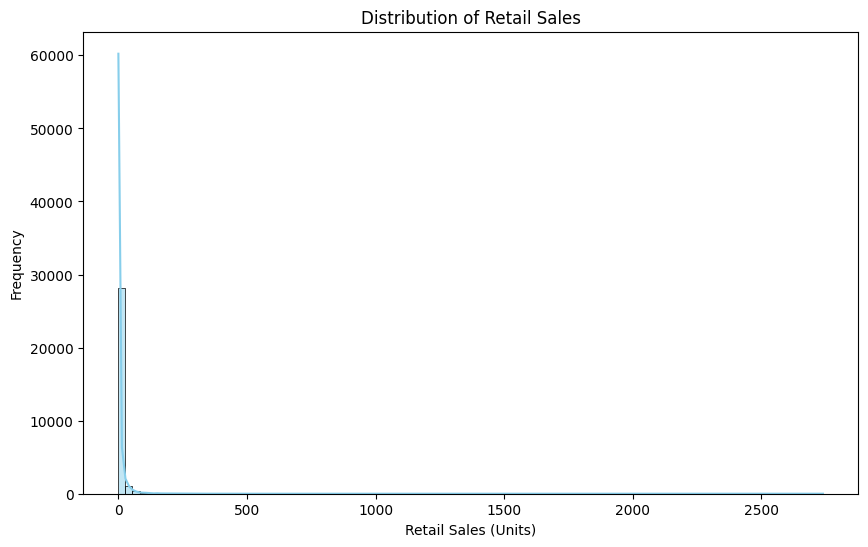

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RETAIL SALES'], kde=True, bins=100, color='skyblue')
plt.title('Distribution of Retail Sales')
plt.xlabel('Retail Sales (Units)')
plt.ylabel('Frequency')
plt.show()

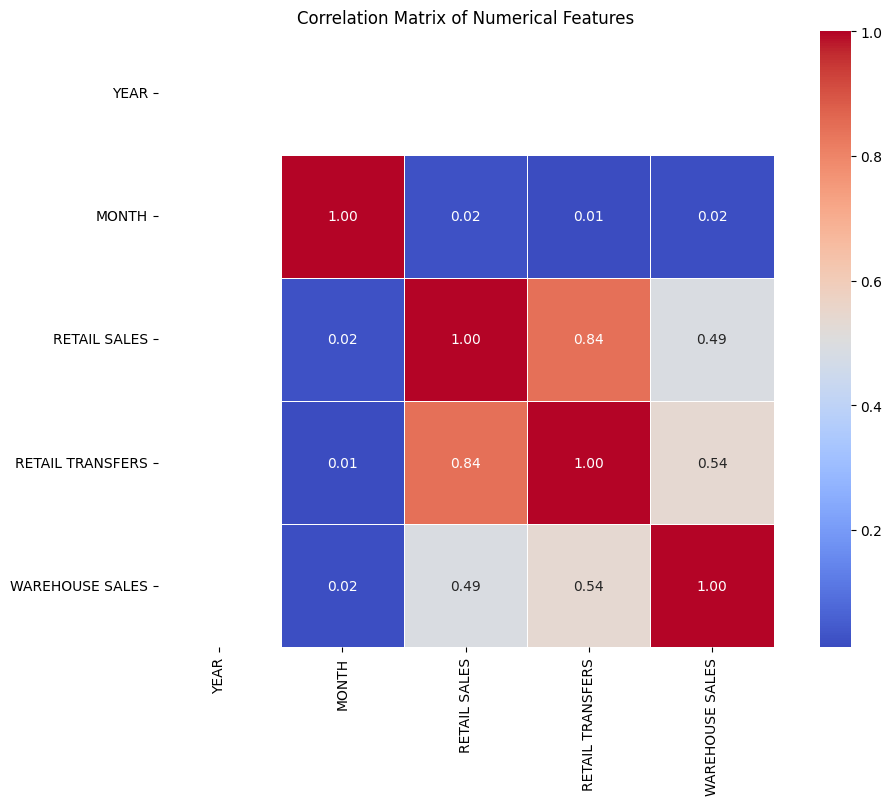

In [39]:
numeric_df = df.select_dtypes(include=[np.number])


plt.figure(figsize=(12, 8))

sns.heatmap(
    numeric_df.corr(),      # Correlation matrix
    annot=True,             # Display correlation values
    cmap='coolwarm',        # Divergent color map for better contrast
    fmt='.2f',              # Show decimals to 2 places
    linewidths=0.5,         # Cleaner grid separation
    square=True             # Makes each cell square-shaped
)

plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [40]:
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

print(df[['YEAR', 'MONTH', 'Date']].head())

   YEAR  MONTH       Date
0  2020      1 2020-01-01
1  2020      1 2020-01-01
2  2020      1 2020-01-01
3  2020      1 2020-01-01
4  2020      1 2020-01-01


In [41]:
categorical_cols = ['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [42]:
X = df.drop(columns=['RETAIL SALES', 'Date'])
y = df['RETAIL SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

NameError: name 'StandardScaler' is not defined

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = rf.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

NameError: name 'X_train' is not defined

In [3]:
# Import necessary libraries
import pandas as pd

In [11]:
# Load the dataset
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

In [12]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [13]:
# Display the shape of the DataFrame
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

# Display the data types of each column
print(df.dtypes)

The dataset has 48204 rows and 9 columns
traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
dtype: int64


In [15]:
# Perform statistical analysis
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


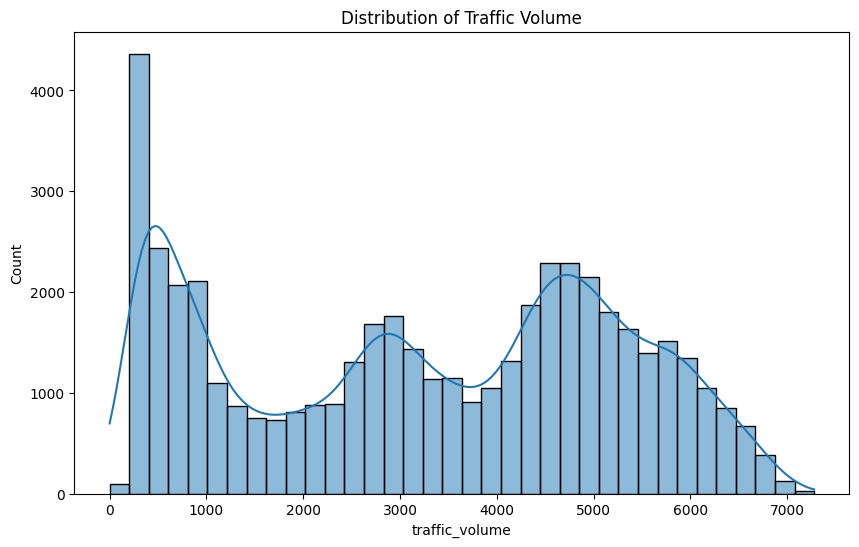

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of traffic volume
plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

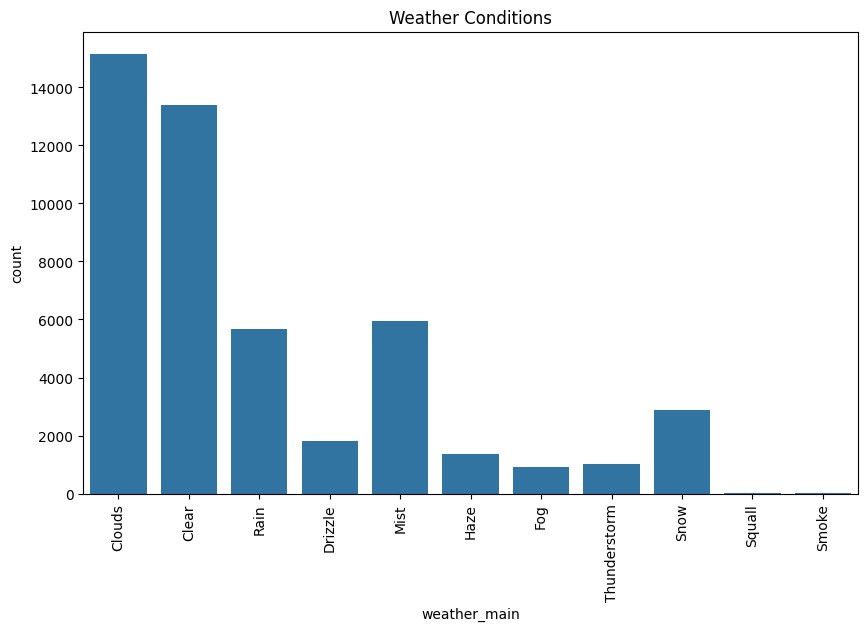

In [17]:
# Bar plot of weather_main
plt.figure(figsize=(10,6))
sns.countplot(x='weather_main', data=df)
plt.title('Weather Conditions')
plt.xticks(rotation=90)
plt.show()

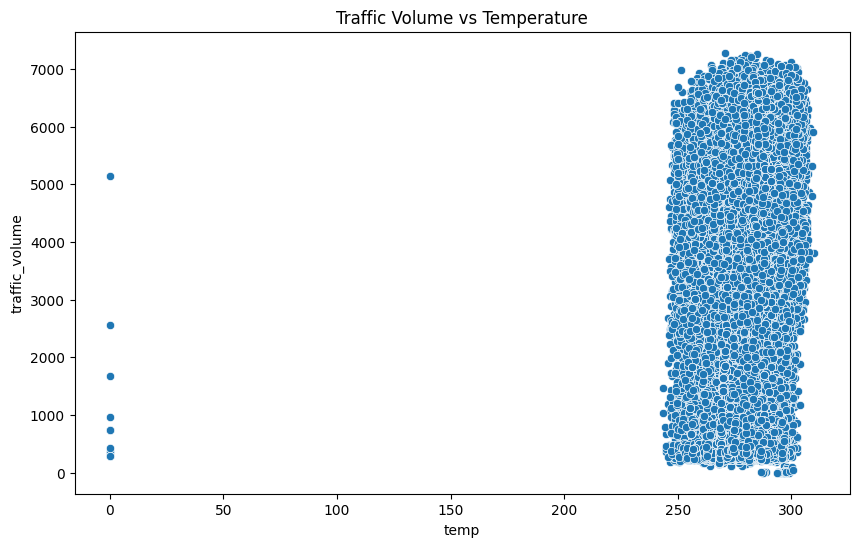

In [18]:
# Scatter plot of traffic_volume vs temp
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='traffic_volume', data=df)
plt.title('Traffic Volume vs Temperature')
plt.show()

In [20]:
# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'],dayfirst=True)

# Extract features from 'date_time'
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

In [21]:
# Convert categorical variables into numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['weather_main', 'weather_description', 'holiday'])

In [22]:
# Here, standardizing 'temp', 'rain_1h', 'snow_1h', and 'clouds_all'

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']] = scaler.fit_transform(df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']])

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the features and the target
X = df.drop(['traffic_volume', 'date_time'], axis=1)
y = df['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the testing data
y_pred = lr.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1580.9714780858649
Mean Squared Error (MSE): 3263398.439714135
Root Mean Squared Error (RMSE): 1806.4878742228343


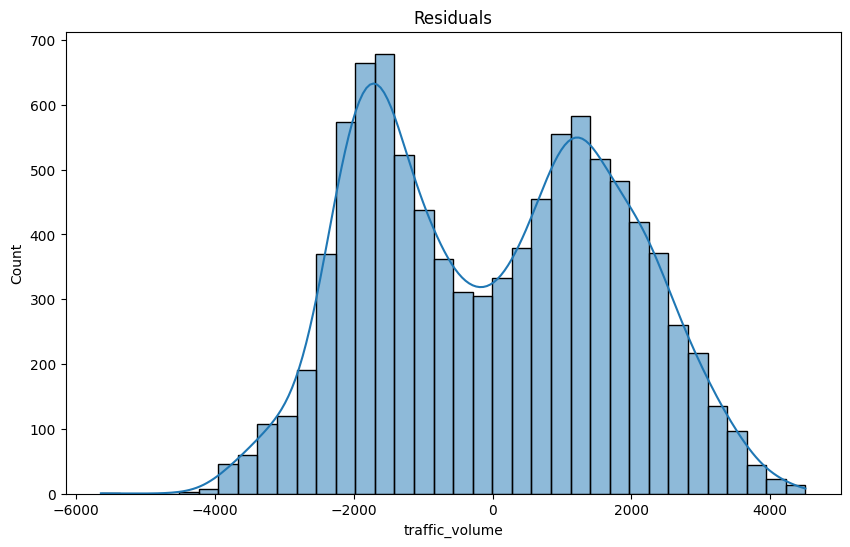

In [26]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals')
plt.show()

In [27]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {'fit_intercept': [True, False]}

# Initialize the Grid Search model
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [28]:
# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'fit_intercept': True}
Best score: -8685928.843936067


In [29]:
# Import necessary library
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, 'traffic_volume_model.pkl')

['traffic_volume_model.pkl']

In [30]:
# Load the model
loaded_model = joblib.load('traffic_volume_model.pkl')

# Use the model for prediction
# Here, we are using the first 10 rows of the testing data for demonstration
sample_data = X_test.iloc[:10]
predictions = loaded_model.predict(sample_data)

# Print the predictions
print(predictions)

[2361.08626849 4305.22670354 2882.90719904 4247.88290095 2503.453391
 3770.5803464  4025.88788594 2454.42729572 3361.71424579 3579.54766829]
